In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

# **Support Vector Machines (SVM)**

## Introduction 
One of the most important concepts in the field of Machine Learning is **classification**. It's widely used in email SPAM detection, image recognition, face recognition, **sentiment analysis** and many more. The main problem of traditional ML algorithms for classification is handling high-dimensional data. One algorithm that solves that problem is **Support Vector Machine (SVM)**. What allows SVM to work with high-dimentional data is a clever technique called the **Kernel trick**. In this tutorial I'm going to explain Support Vector Machines, the mathematical concepts behind them, their methods, what is the Kernel trick and how it works, implementations and applications. Support Vector Machine is a powerful **supervised** machine learning algorithm that is used for linear or non-linear classification, regression and outlier detection.The primary objective of the SVM algorithm is to find the optimal **hyperplane** in an N-dimentional space(N-number of **features**) that can separate the **data points** of different classes in the feature space.This separation is achieved with the maximum possible **margin**.

methodologies and math concepts 
1. how does it work
2. vsichki drugi gluposti
3. nekvi drugi raboti
4. kernel trick/kernel functions

## Some definitions and explanations to make things more clear
1. **Classification** is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.[1]

2. **Sentiment analysis** is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.[2]

3. **Supervised** machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled data sets to train algorithms that to classify data or predict outcomes accurately.[3] SVM's are a supervised algorithm because they need labeled data to find the hyperplane in the first place.

4. **Hyperplane** is a decision boundary that separates data points into different classes. In two-dimensional space, a hyperplane is simply a line that separates the data points into two classes. In three-dimensional space, a hyperplane is a plane that separates the data points into two classes.[4] It divides the input space into two or more regions, each corresponding to a different class or output label.[5]

5. **Data points**- In the case of support vector machines, a data point is viewed as a N-dimensional vector (a list of numbers), and we want to know whether we can separate such points with a N-dimensional hyperplane.[6]

6. **Features** is an individual measurable property within a recorded dataset. In machine learning and statistics, features are often called “variables” or “attributes”.[7] Some example features in a dataset could be age, height, weight

7. **Margin** is the distance between the decision boundary (hyperplane) and the closest data points from each class. The main objective of the support vector e algorithm is to maximize the margin. The wider margin indicates better classification performance.[8][9] 

8. **Support vectors** are the closest data points to the hyperplane. These data points are important because they determine the position and orientation of the hyperplane.[10]

9. **Linear SVM** tries to find a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the data into different classes with the maximum possible margin.[11]

10. **Hard Margin** is used when the data is perfectly linearly separable. It finds a hyperplane that separates the classes with no misclassifications. The objective is to identify a hyperplane that completely separates data points belonging to different classes, ensuring a clear demarcation with the utmost margin width possible.[12]

11. **Soft Margin** is used when the data is not perfectly separable. It allows some misclassifications to achieve a better overall separation. It introduces flexibility by allowing some margin violations (misclassifications) to handle cases where the data is not perfectly separable. Suitable for scenarios where the data may contain noise or outliers. It Introduces a penalty term for misclassifications, allowing for a trade-off between a wider margin and a few misclassifications.[13]

12. **Outlier** is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.[14] A single data point that goes far outside the average value of a group of statistics.[15]

13. **Missclasification**(not Missclasification rate) Occurs when data points are assigned to a different category than the one they should be in[16].

14. **Missclasification rate** is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.[17] 

15. **Non-Linear SVM** (simply explained) is necessary when the data cannot be effectively separated by a linear decision boundary in the original feature space. Nonlinear SVM addresses this limitation by utilizing kernel functions to map the data into a higher-dimensional space where linear separation becomes possible. [18]

## **Methodologies, math concepts and definitions**

### How does (Linear) SVM work - Basic intuition....
I shall not scare you away with much theory and math still. I will introduce you to the algorithm by explaining it simply.
Each object of the dataset is represented as a point in an N-dimensional space. SVM's performs classification by "drawing" a hyperplane and all points of one category are on one side of the hyperplane, and all points of the other category are on the otherside.There could be multiple hyperplanes but SVM tries to find the one that best seperates the categories in the sense that it maximizes the distance to points in either category.The distance is called the margin and the points that fall on the margin are called support vectors. To find the hyperplane SVM requires a training set of points already labeled with the category, that is why it's a supervised algorithm. In other words SVM needs those support vectors in order to determine where to position the hyperplane. The ideal hyperplane is the one that is positioned equally half-way between the two support vectors.[19]

Did i scare you away yet?? Good, then I shall make life "easier" by giving an example of how **linear SVM** works, because it's key to understanding the basics which we are going to built on. 

Let's imagine that we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue.

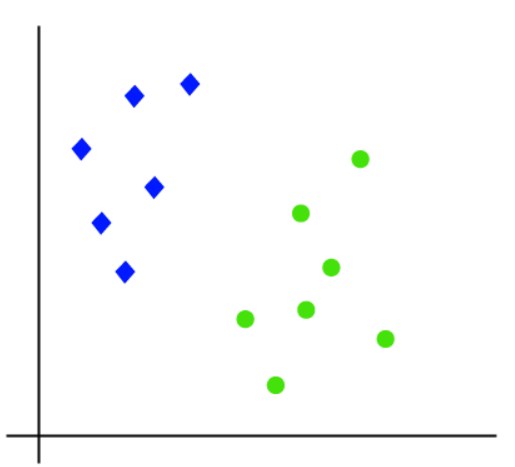 [20]

By the looks of it it's a 2-d space so by just using a straight line, we can easily distinguish these two classes. But there can be multiple lines(hyperplanes) that can separate these classes.

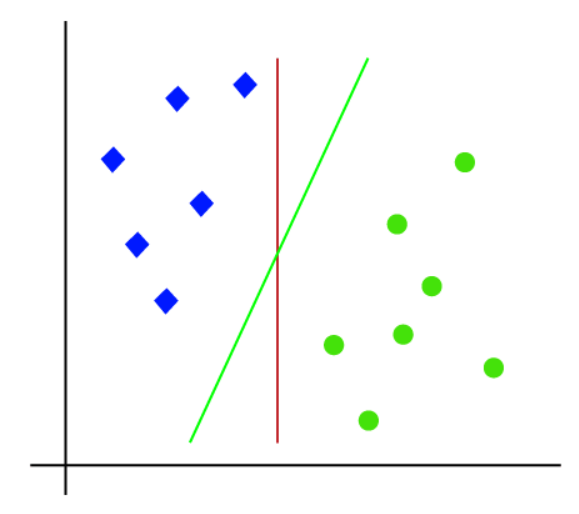  [21]

SVM finds the one that represents the largest separation or margin between the two classes. The algorithm finds the closest points from both classes, also called the support vectors and it "draws" the line in such a way that it's position and orientation maximize the distance between the two points. That is what we call the optimal hyperplane. To put it simply, the support vectors supervise the creation of the hyperplane.

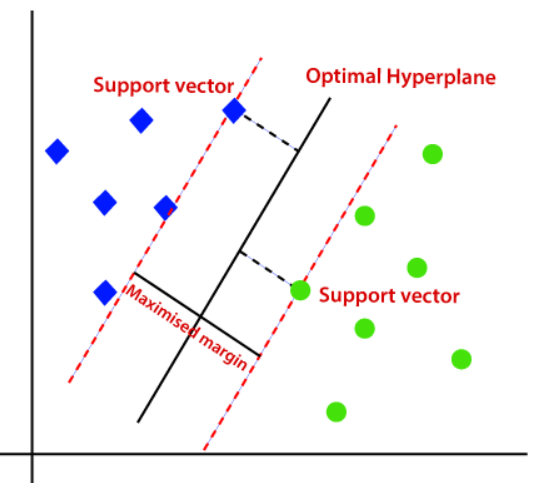 [22]

And that way we separated the two classes of the linear SVM, every object on the left side of the hyperplane would be categorized as blue and every object on the right side would be categorized as green. Every new observation with features that position it in either side of the hyperplane would be classified depending on which side it will be.

So far so good, we found the hyperplane whose distance to the nearest data point on each side is maximized. If such a hyperplane exists it is known as the maximum-margin hyperplane or the **hard margin**. The hard margin works amazing when the data is perfectly linearly seperable, but what happens when things aren't perfect, which is the case in most real life situations. 

Let's see what happens if we have another situation where we have seperated two classes of blue and red circles, but there is one problem, we have **outlier** that is not where it belongs, a blue point in the red side of the hyperplane. This is called **missclasification**. Hard margins were amazing until now, but they don't work well with missclasifications. Every single outlier can make it impossible for them to find a perfect separation. 

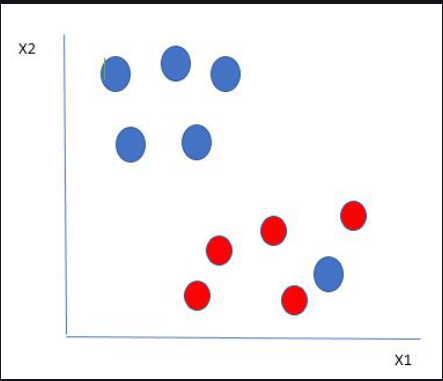 [23]

This still counts as linear SVM, but the outlier makes it almost impossible for the hard-margin technique to succeed in it's purpose. In these situations we use a technique called **soft margin**. A soft margin SVM is used when the data is not perfectly separable. It allows some misclassifications to achieve a better overall separation. In this situation SVM finds the maximum margin as done with previous data sets. Along with that it adds a **penalty** each time a point crosses the margin. It introduces a penalty term for misclassifications, allowing for a trade-off between maximizing the margin and minimizing classification errors.

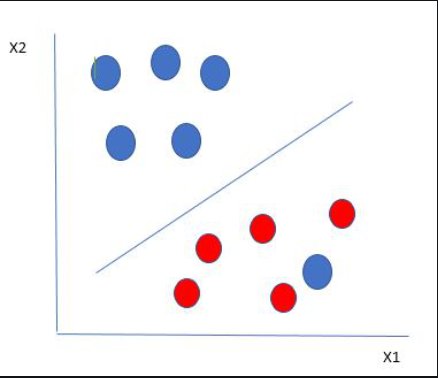 [24]

This was a pretty vague explanation of soft margin, but don't worry I will dwelve into it in a bit.

Furthermore what happens when data is not even linearly seperable anymore, something like this.

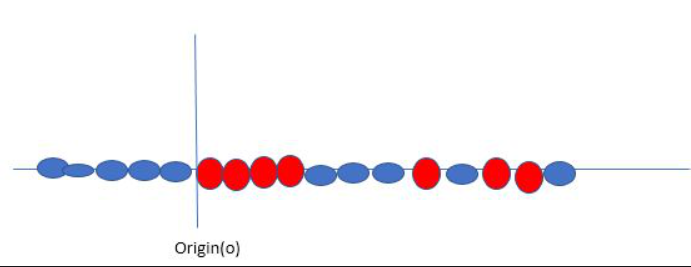 [25]

And that's where we use **Non-linear SVM's**, but in order for me to explain them in an understandable and useful manner I shall end with the "basic" part here and explain everything from the beginning, but this time with more theory and a "little bit" of math.

### Math concepts behind Support vector machines, methodologies and deeper understanding.

You still here? Amazing! I will reward that by beginning with some easier and fundamental math concepts and definitions.
Let's begin with something simple, that is the basis of all.......And that is the vector.....Get it Support VECTOR Machines..

**1.VECTOR** A vector is a mathematical object that has both magnitude and direction. It is often represented as an ordered list of numbers, which correspond to its coordinates in a given space.[26] A point in the 2D plane can be represented as a vector between origin and the point.

**Notation of vector:** A vector is typically denoted by a boldface letter (e.g. $\mathbf{x}$) or by an arrow above the letter (e.g., $\vec{x}$
). In written text, vectors are often represented as:$$\mathbf{x} = \begin{bmatrix} 
x_1 \\ 
x_2 \\ 
\vdots \\ 
x_n 
\end{bmatrix}$$
where \($x_1, x_2, \ldots, x_n\$) are the components of the vector.

**Visual example of a vector:** 

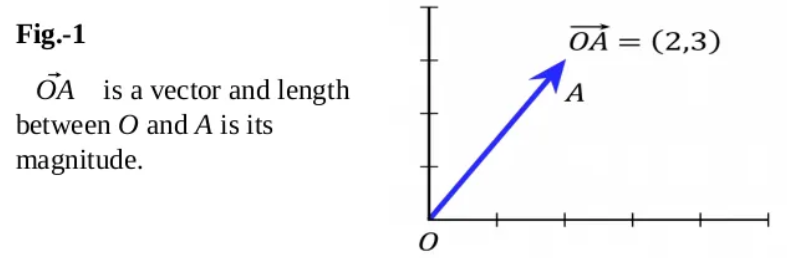 [27]

Let's see what the magnitude and direction of a vector are, how do you calculate them?

**1.1 Length of a vector or "magnitude":** tells us how far vectors are from the origin. It's called a *norm* and is written as $\left\lVert \mathbf{x} \right\rVert$. There are different types of norms, but the one we need here is called The Euclidean norm $\mathbf{L_{2}}$ or literally the Pythagora's theorem.The Euclidean norm formula to calculate the norm of a vector $\mathbf{x}$= \($x_1, x_2, \ldots, x_n\$) ) is

$$ \left\lVert \mathbf{x} \right\rVert = \sqrt{(x_1)^2 + (x_2)^2 + \ldots + (x_n)^2} $$:
**Example for finding the magnitude of a vector:** 

Let's say we have a vector $\vec{OA}(3,4)$ .We can easily find the magnitude of the vector.
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{3^2 + 4^2}$$
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{9 + 16}$$
$$\left\lVert \mathbf{OA} \right\rVert = \sqrt{25}$$
$$\left\lVert \mathbf{OA} \right\rVert = 5$$

Good we now know what the length of a vector is....I hope. Now let's see what the direction of a vector is

**1.2 Direction of a vector** The direction of a vector is the angle made by the vector with the horizontal axis [28] The direction of a vector $\mathbf{x} = (x_{1}, x_{2})$ is noted as $w$. It is defined as: $w = (\frac{x_{1}}{\left\lVert \mathbf{x} \right\rVert}, \frac{x_{2}}{\left\lVert \mathbf{x} \right\rVert} )$ ....... We can also call that a **unit vector**. A vector that has a magnitude of 1 is a unit vector. It is also known as Direction Vector. For example, vector $\mathbf{x}$(1,3) is not a unit vector, because its magnitude is not equal to 1, $\left\lVert \mathbf{x} \right\rVert \neq 1$ . Any vector can become a unit vector by dividing it by the magnitude of the given vector. 

**Example for finding the direction of a vector**
We will take a vector $\mathbf{u}$ with the same coordinates as in the magnitude example $\mathbf{u}(3,4)$

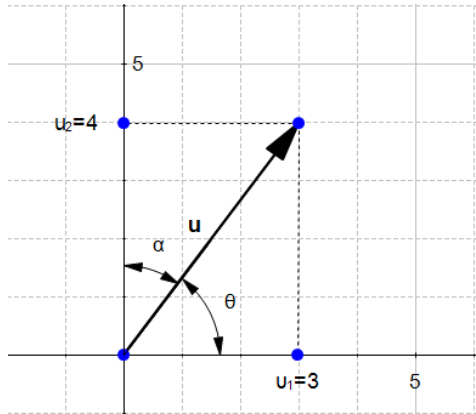 [30]

The direction of that vector we can get by finding the unit vector....and now we know what it is. We divide the vector by it's magnitude(we already know that the magnitude is equal to 5).
We shall calculate it with the first coordinate: 3
$$\frac{u_{1}}{\left\lVert \mathbf{u} \right\rVert} = \frac{3}{5} = 0.6 $$

And now with the other coordinate: 4

$$\frac{u_{2}}{\left\lVert \mathbf{u} \right\rVert} = \frac{4}{5} = 0.8$$

Now we see that the direction of the vector is (0.6, 0.8) and if we draw it(remember the norm is equal to 1 so the x and y end in 1)

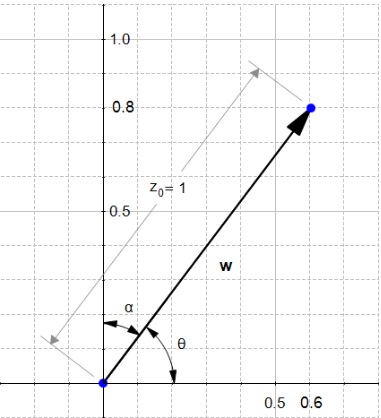 [31]

We can see that it looks the same as the original one, but it's smaller as it's norm is equal one. With the help of this small but vital vector we can now determine the direction of a vector. There might also be other ways, but for the sake of keeping it simple(especially me) this is the one i chose.

**1.3 Dot product of a vector**
One very important concept to understand in SVM's is the **dot product**.  The dot product, also known as the inner product or scalar product, is a mathematical operation that takes two vectors and returns a scalar value. In the case of SVM with kernels, the dot product is used to measure the similarity or dissimilarity between two feature vectors.[32]. It tells how to vectors are related. 
Geometrically, it is the product of the magnitudes of the two vectors $ \left\lVert \mathbf{x} \right\rVert\left\lVert \mathbf{y} \right\rVert\ $ and the cosine of the angle between them $\cos \theta$  [33]
$$\mathbf{x} \cdot \mathbf{y} = \left\lVert \mathbf{x} \right\rVert\left\lVert \mathbf{y} \right\rVert\cos \theta.$$

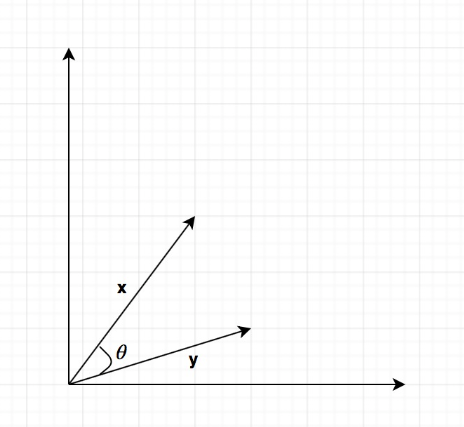 [34]

And how do we get the theta $\theta$ ?? Let's say that $\beta$ is the angle between $\mathbf{x}$ and  $\mathbf{y}$ $\alpha$ is the angle between the x-axis and  $\mathbf{y}$  

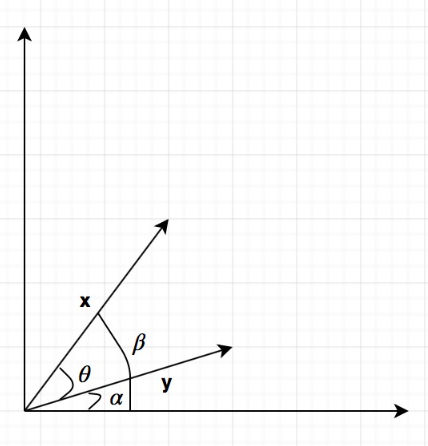

By looking at this figure we can say that $\theta$ is $\beta$ - $\alpha$, then we can get 
$$\cos(\theta) = \cos(\beta - \alpha)$$
$$\cos\beta\cos\alpha + \sin\beta\sin\alpha$$
$$\frac{x_{1}}{\left\lVert \mathbf{x} \right\rVert}\frac{y_{1}}{\left\lVert \mathbf{y} \right\rVert} + \frac{x_{2}}{\left\lVert \mathbf{x} \right\rVert}\frac{y_{2}}{\left\lVert \mathbf{y} \right\rVert}$$
$$\frac{x_{1}y_{1} + x_{2}y_{2}}{\left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert}$$

We substitute this into the geometric dot product formula, we get:
$$x \cdot y = \left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert \frac{x_{1}y_{1} + x_{2}y_{2}}{\left\lVert \mathbf{x} \right\rVert \left\lVert \mathbf{y} \right\rVert}  = x_{1}y_{1} + x_{2}y_{2}$$

This is the algebraic formula of dot product. In general, dot product can be computed as the following for two n-dimensional vectors: [35]
$$x \cdot y = \sum_{i=1}^{n} x_i y_i$$
This is what we mostly use to find the dot product that is crucial to the definition of our next concept....the hyperplane
And before I get into that I shall mention again what linear separability is and then connect all other concepts to it....until we reach the point where we face with non-linear separability

**2.Linear separability** is one important concept in SVM. Although in practical cases the data might not be linearly separable, we will start from the linearly separable cases (since they are easy to understand and deal with) and then derive the non-linearly separable cases.[36]

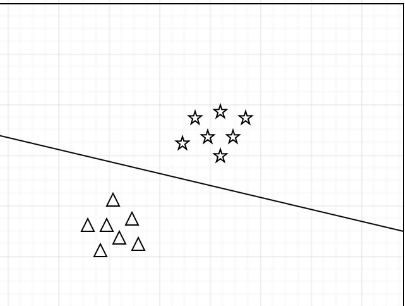 [37]

**3 Hyperplane** It is plane that linearly divide the n-dimensional data points in two component. In case of 2D, hyperplane is line, in case of 3D it is plane.It is also called as n-dimensional line.[38]

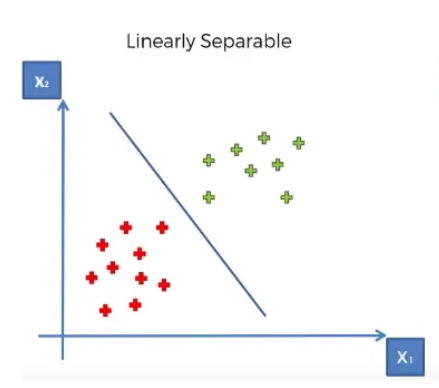 [39]

The two-dimensional linearly separable data can be separated by a line. The function of the line is $y = ax + b$, which is. For example we will rename x with $x_{1}$ and y with $x_{2}$ and we will get 
$$ax_{1} - x_{2} + b = 0$$
If we define $\mathbf{x} = (x_{1}, x_{2})$ and $\mathbf{w} = (a, -1)$ , we will get
$$\mathbf{w} \cdot \mathbf{x} + b = 0$$
Where: 
1. $\mathbf{w}$ is a normal vector perpendicular to the hyperplane.
2. $\mathbf{x}$ is a point on the hyperplane
3. $b$ is the bias term or intercept.

Feel confused?...No worries i will try to explain. You probably know that an equation of a line is: $y = ax + b$ , if you didn't congratulations, now you know. And how does this equation help with the hyperplane??? In the hyperplane equation you can see that the name of the variables are in bold. Which means that they are vectors! Moreover this is how we compute dot product. To generalize the two equations are just different ways of expressing the same thing. But using the formula derived from the one of the function of the line (aka the hyperplane formula)$\mathbf{w} \cdot \mathbf{x} + b = 0$ is easier to work in more than two dimensions with this notation and the vector $\mathbf{w}$  will always be norma(normal because we use this vector to define the hyperplane, so by definition it will be normal.When we define a hyperplane, we suppose that we have a vector that is orthogonal to the hyperplane)....And this last property will come in handy to compute the distance from a point to the hyperplane.

**4.Classification with hyperplanes** In a binary classification problem, we want to find a hyperplane that separates the data points of two classes. Once we have the hyperplane, we can then use the hyperplane to make predictions. We define the hypothesis function h as:[40]
$$
h(x_i) = \begin{cases}
+1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b \geq 0 \\
-1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b < 0
\end{cases}
$$
The point above or on the hyperplane will be classified as class +1, and the point below the hyperplane will be classified as class -1.So basically, the goal of the SVM learning algorithm is to find a hyperplane which could separate the data accurately. There might be many such hyperplanes. And we need to find the best one, which is often referred as the **optimal hyperplane.** [41]

**5.Margin** The margin is the distance between the hyperplane and the nearest data points from either class. The goal of SVM is to find the hyperplane that maximizes this margin. To find the optimal hyperplane, we maximize the margin while ensuring all points are correctly classified. The margin is defined as: $\gamma = \frac{2}{\left\lVert \mathbf{w} \right\rVert}$

Let's derive the formula really quick. So we get the hyperplane equation( $\mathbf{w} \cdot \mathbf{x} + b = 0$) and we consider the support vectors and with them(the classifications aka both sides of the hyperplane +1 and -1) we get $\mathbf{w} \cdot \mathbf{x} + b = \pm 1$. Here I shall introduce a really simple yet effective concept,

**5.1 Distance from a point to the hyperplane**- The perpendicular distance $d$ from a point $\mathbf{x_{0}}$ to the hyperplane 
$$ d = \frac{\left| \mathbf{w} \cdot \mathbf{x}_0 + b \right|}{\|\mathbf{w}\|} $$
For support vectors, this distance is:
$$d = \frac{\left| 1 \right|}{\|\mathbf{w}\|} = \frac{1}{\|\mathbf{w}\|}$$

The margin is defined as the distance between the two parallel hyperplanes that pass through the support vectors of each class. The total margin width is therefore:
$$ 2 \times \frac{1}{\|\mathbf{w}\|} = \frac{2}{\|\mathbf{w}\|} $$

I know I probably tired you with concepts until now, but the fun only begins. All of this I (at least tried) to describe, because they are the fundamentals of the **SVM optimization problem**.

**6.Optimization problem(linear...hard margin)** When the data is perfectly linearly separable, we aim to find a hyperplane that separates the data points of different classes with the maximum margin and no classification errors. To maximize the margin, we need to minimize the norm of the weight vector$\left\lVert \mathbf{w} \right\rVert$ while ensuring all points are correctly classified(it has a constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \; \forall i$). 

The optimization problem can be formulated as follows:

**Objective:**
$$\min_{\mathbf{w}, b} \; \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2}$$

**Constraints:**

$$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \; \forall i$$

Where:
- $\mathbf{w}$ is the weight vector.
- $b$ is the bias term.
- $y_i$ is the class label for the $i$-th data point, which can be $+1$ or $-1$.
- $\mathbf{x}_i$ is the feature vector of the $i$-th data point.

**Objective Function:**

The term $\frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2}$ is minimized to ensure the margin is maximized. The factor of $\frac{1}{2}$ is used for mathematical convenience, making the derivatives cleaner.

**Constraints:**

The constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ ensures that each data point is correctly classified and lies outside or on the margin boundaries.

- For a point $\mathbf{x}_i$ from class $+1$, this means $\mathbf{w} \cdot \mathbf{x}_i + b \geq 1$.
- For a point $\mathbf{x}_i$ from class $-1$, this means $\mathbf{w} \cdot \mathbf{x}_i + b \leq -1$.

**Geometric Interpretation:**

The margin is the distance between the two parallel hyperplanes:
$$\mathbf{w} \cdot \mathbf{x} + b = 1$$
$$\mathbf{w} \cdot \mathbf{x} + b = -1$$

The hard margin SVM optimization problem can also be called **convex optimization problem**, specifically framed as **Quadratic Programming problem(QP)**. This problem is convex because the objective function $\frac{1}{2}\left\lVert \mathbf{w} \right\rVert^{2}$ is a convex function (a quadratic function with a positive semi-definite Hessian), and the constraints $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ define a convex feasible region (affine functions defining a half-space).

We now probably know the objective of the optimization problem, we just need to minimie $\left\lVert \mathbf{w} \right\rVert$ to maximize the margin, sounds simple, but there is a lot more going on underneath it and we shall try and understand how to solve that constrained optimization problem. To solve To solve the constrained optimization problem, we use the method of Lagrange multipliers. A quick disclaimer..here the math get's interesting.

**7.Lagrange formulation/Lagrange problem**
As I stated before that to solve this constrained optimization problem, we introduce Lagrange multipliers($\alpha_{i} \geq 0$) for each constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$  . These are variables that allow us to incorporate the constraints into the objective function.
The Lagrangian function $L_P$ combines the objective function and the constraints using Lagrange multipliers $\alpha_i$
.
The Lagrangian function for the primal formulation of SVM is given 

$$L_p(\mathbf{w},b,\mathbf{\alpha}) = \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} - \sum_{i=1}^{n} \alpha_i[y_i(\mathbf{w} \cdot \mathbf{x}_i + b) - 1] $$$
$
**Breakdown of the problem**
- $\mathbf{w}$ is the weight vector,
- $b$ is the bias term,
- $\boldsymbol{\alpha} = (\alpha_1, \alpha_2, \ldots, \alpha_n)$ are the Lagrange multipliers associated with each constraint,
- $y_i$ is the class label for the $i$-th data point,
- $\mathbf{x}_i$ is the feature vector of the $i$-th data point
- $|\mathbf{w}\|^2 = \mathbf{w} \cdot \mathbf{w}$ is the squared norm of the weight vector, which we want to minimize.

**Objective Term:**$ \frac{1}{2} \|\mathbf{w}\|^2 $
This term is what we want to minimize: the squared length of the weight vector $\mathbf{w}$. Minimizing this helps to maximize the margin.(Sorry that I'm repeating myself...just making sure you remember

**Constraint Terms:**
$$ \sum_{i=1}^{n} \alpha_i \left[ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 \right] $$
- Each constraint $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 $ is incorporated into the Lagrangian with a multiplier $\alpha_i$.
- If the constraint is satisfied, the term $\alpha_i [ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 ] $ is zero.
- If the constraint is violedat, the Lagrange multipli i$will be adjusted to penalize the viotion.t]


**7.1 Karush-Kuhn-Tucker(KKT) conditions** are used in optimization to handle constraints in a systematic way. They are essential in the context of Support Vector Machines (SVMs).The Karush-Kuhn-Tucker (KKT) conditions provide necessary and sufficient conditions for optimality. Let's go through all of them one by one.

**1.Stationarity conditions** - To find the optimal $\mathbf{w}$ and $b$, we take the **partial derivatives** of the Lagrangian with respect to $\mathbf{w}$ and $b$ and set them  zero

**Partial derivative with respect to $\mathbf{w}:$**

$$\frac{\partial L_P}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i = 0$$

**Solving for $\mathbf{w}$:**
$$\mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i$$

This equation tells us that the optimal weight vector $\mathbf{w}$ is a linear combination of the training data points $\mathbf{x}_i$, weighted by the Lagrange multipliers $\alpha_{i}$ and their corresponding labels $y_{i}$

**Partial derivative with respect to $b$**
$$\frac{\partial L_P}{\partial b} = - \sum_{i=1}^{n} \alpha_i y_i = 0$$

This condition ensures that the sum of the products of the Lagrange multipliers and the class labels equals zero:
$$\sum_{i=1}^{n}\alpha_i y_i = 0 $$

**2.Primal feasibility and Dual feasibility**

**Primal feasibility**
$$y_{i}(\mathbf{w} \cdot \mathbf{x}_{i} + b) \geq 1$$

This ensures that all data points are correctly classified with a margin of at least 1

**Dual feasibility**
$$\alpha_{i} \geq 0$$

The Lagrange multipliers must be non-negative

**3.Complementary slackness** 

The complementary slackness condition states that for each $i$, either the constant $y_{i}(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ is active  (i.e., it holds with equality) or the corresponding Lagrange multiplier $\alpha_i$ is zero:
$$\alpha_i[y_i(\mathbf{w} \cdot \mathbf{x}_i + b) - 1]= 0$$

This means that if $\alpha_i > 0$, then $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) = 1$ , these points are called support vectors.

**8.Dual problem** 
A quick RECAP. The primal problem of the hard margin SVM is to find the hyperplane that separates two classes with the maximum margin. And here we can introduce the dual problem.

The dual problem often simplifies the computation, especially when the number of constraints (data points) is larger than the number of features (dimensionality).It is easier to solve because it only involves the Lagrangian multipliers.

**Formulating the dual problem**
1. To derive the dual problem, we start by constructing the Lagrangian. This combines the objective function and the constraints using Lagrange multipliers(I know i am repeating myself).
2. We find the stationary conditions(partial derivatives with respect to $\mathbf{w}$ and $b$).

And here comes the next step:



3. We substitute $\mathbf{w}$ back into the Lagrangian: Replacing $\mathbf{w}$ with $\mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i$

$$L_p = \frac{1}{2}(\sum_{i=1}^{n} \alpha_i y_i \mathbf{x}_i)\cdot(\sum_{j=1}^{n} \alpha_j y_j \mathbf{x}_j) - \sum_{i=1}^{n} \alpha_i[y_i(\sum_{i=1}^{n}\alpha_j y_j(\mathbf{x}_i\cdot \mathbf{x}_j)+ b)-1]$$

Simplify it:
$$L_p = \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j(\mathbf{x}_i \cdot \mathbf{x}_j) - \sum_{i=1}^{n} \alpha_i$$

**Dual problem**
The dual problem is now to maximize the dual objective function:
$$max_\alpha\sum_{i=1}^{n} \alpha_i -\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j(\mathbf{x}_i \cdot \mathbf{x}_j)$$

Subject to:
$$\sum_{i=1}^{n}\alpha_i y_i = 0$$
$$\alpha_i \geq 0   \forall_i$$

**Solving the dual problem**

To solve the dual problem, we typically use quadratic programming (QP) methods. Once we find the optimal $\alpha_i$, we can compute the weight vector $\mathbf{w}$ and the bias term $b$...This means we can finally find the optimal hyperplane:

**Weight vector $\mathbf{w}$**

$$\mathbf{w} = \sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i$$

**Bias term b**:

The bias term can be determined using the support vectors $\mathbf{x}_k$ (data points for which 0 < $\alpha_k$):

$$b = y_k - \mathbf{w} \cdot \mathbf{x}_k$$

By solving the dual problem, we can efficiently find the maximum-margin hyperplane, even in high-dimensional or non-linear spaces using the kernel trick. This approach leverages the power of quadratic programming to handle complex optimization problems in SVMs.

**8.Conclusion to the Lagrangian/Dual problem**
The hard margin linear SVM aims to find the hyperplane that maximally separates two classes with no misclassifications. It does this by minimizing the norm of the weight vector, while ensuring all data points are correctly classified. To handle this optimization efficiently, we use the Lagrangian dual problem.

1. Primal Problem: Minimize the weight vector's norm while ensuring all points are correctly classified.
2. Lagrangian Dual Problem: Reformulate the problem using Lagrange multipliers to handle constraints more easily.
3. Dual Problem: Maximize a function of these multipliers, making the problem easier to solve, especially for large datasets.
4. Solution: Use the multipliers to find the optimal hyperplane.

The problem with Hard Margin SVM is that it does not tolerate outliers and it only works for linearly separable data. The reason is that if you remember our initial optimization problem the constraints are $y_i(\mathbf{w} \cdot \mathbf{x}_i + b \geq 1)$, for each example. For the optimization problem to be solvable, all the constraints have to be satisfied. If there is an outlier example which makes the constraint not be satisfied, then the optimization will not be solvable. [41]  

However, this would not be the case in the real world. It is most likely that in practical cases the data will contain some noise and might not be linearly separable. Here is where we will talk about **non-linear SVM's** and finally will discuss and learn about **soft-margin SVM'** s and the clever technique **Kernel trick** that allows SVM's to work with high-dimentional data.

**9.Non-Linear SVM's**
Sometimes, data points are not linearly separable. Non-linear SVMs handle this by mapping data into a higher-dimensional space where a linear hyperplane can separate the classes.

**10.Soft margin SVM** We summarized that hard margin SVM's don't work well with outliers in the data. In real-world data, perfect separation is often not possible due to noise and overlapping classes. Simply put hard margin doesn't allow for missclassifications.

To handle this problem, Soft margin SVMs allow some misclassifications to find a better overall classifier. We introduce slack variables $\xi_i$ to allow some missclassifications.

Basically, the trick Soft Margin SVM is using is very simple, it adds slack variables $\xi_i$ to the constraints of the optimization problem. [41]

**The constraints now become:**
$$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i , \forall_i$$

By adding the slack variables, when minimizing the objective function, it is possible to satisfy the constraint even if the example does not meet the original constraint. The problem is we can always choose a large enough value of $\xi$ so that all examples will satisfy the constraints.[42]

One technique to handle this is to use regularization. We could us regularization to penalize large values of $\xi$. 
**The reguliszed optimization problem becomes:** [42]
$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} + \sum_{i=1}^{n} \xi_i$$

Subject to: $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i $

The regularization penalty is used to help stabilize the minimization of the objective or infuse prior knowledge we might have about desirable solutions[43]

Also, we want to make sure that we do not minimize the objective function by choosing negative values of $\xi$. We add the constraint $\xi_i \geq 0$. We also add a **regularization parameter C** to determine the effect of the slack variable(how much we want to avoid misclassifying each training example.)

**The optimization problem now becomes(the Soft margin optimization problem)**
$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \left\lVert \mathbf{w} \right\rVert^{2} + C \sum_{i=1}^{n} \xi_i$$

Subject to: 
$$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i $$ $$\xi_i \geq 0$$

Again, if we use Lagrange multipliers method like above, and we do all the hard math(minimizing the Lagrangian with respect to $\mathbf{w}, b, \xi_i$ and setting their derivatives to zero), the optimization problem could be transformed to a **dual problem**:

**Dual problem Soft margin**
$$max_{\alpha}\sum_{i=1}^{n} \alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j \mathbf{x}_i \cdot \mathbf{x}_j$$

Subject to: $0 \leq \alpha_i \leq C$

Here the constraint $\alpha_i \geq 0$ has been changed to $0 \leq \alpha_i \leq C$

All good until now, but what does the regularization parameter $C$ do??

**10.1 Regularization parameter C** The regularization parameter $C$ in Support Vector Machines (SVMs) controls the trade-off between achieving a larger margin and ensuring that the data points are correctly classified. It determines the effect of $\xi$. Another way of thinking of $C$ is it gives you control of how the SVM will handle errors. If we set $C$ to positive infinite, we will get the same result as the Hard Margin SVM. On the contrary, if we set $C$ to 0, there will be no constraint anymore, and we will end up with a hyperplane not classifying anything. 

Simply said: 
1. Small values of $C$ will result in a wider margin, at the cost of some misclassifications(allowing more misclassifications.)
2. Large values of $C$ will give you the Hard Margin classifier and tolerates zero constraint violation. It will prioritize minimizing misclassifications over maximizing the margin.
3. We need to find a value of $C$ which will not make the solution be impacted by the noisy data(outlier).

Good job, we now now what Soft Margin SVM's are....I hope,again. Soft Margin SVM can handle the non-linearly separable data caused by noisy data(outliers). But what if the non-linear separability is not caused by the noise? What if the data are characteristically non-linearly separable?

That is where I shall finally introduce you to the star of this whole algorithm...**The Kernel Trick/Kernel Parameters**.

**11 The Kernel Trick/Kernel Parameters** 

In machine learning, particularly in algorithms like SVMs, the primary challenge is often to find a decision boundary (hyperplane) that separates classes in the input space. However, many real-world datasets are not linearly separable, meaning a simple straight line or plane cannot effectively separate the classes.

The Kernel Trick is a method used in Support Vector Machines (SVMs) to convert data (that is not linearly separable) into a higher-dimensional feature space where it may be linearly separated. [44] We map the data into a higher-dimensional space where it becomes linearly seperable. 

Instead of explicitly transforming data, we use kernel functions to compute the inner products in this higher-dimensional space directly in the original input space.

All of this sounds confusing? Don't worry I shall explain everything thorough, give examples and of course include some math.

**11.1 Visual example of Kernel trick(to make things more clear)**

Let’s take an example to understand the kernel trick in more detail. Consider a binary classification problem where we have two classes of data points: red and blue. The data is not linearly separable in the 2D space. We can see this in the plot below: [46]

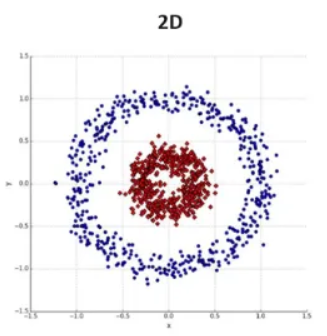 [46]

To make this data linearly separable, we can use the kernel trick.

By applying the kernel trick to the data, we transform it into a higher-dimensional feature space where the data becomes linearly separable. We can see this in the plot below, where the red and blue data points have been separated by a hyperplane in the 3D space

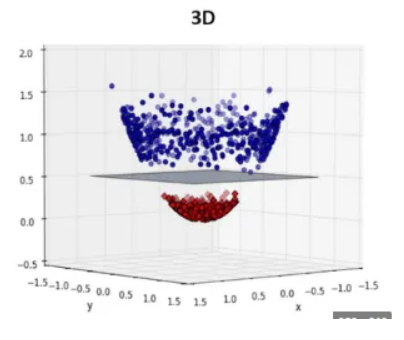 [46]



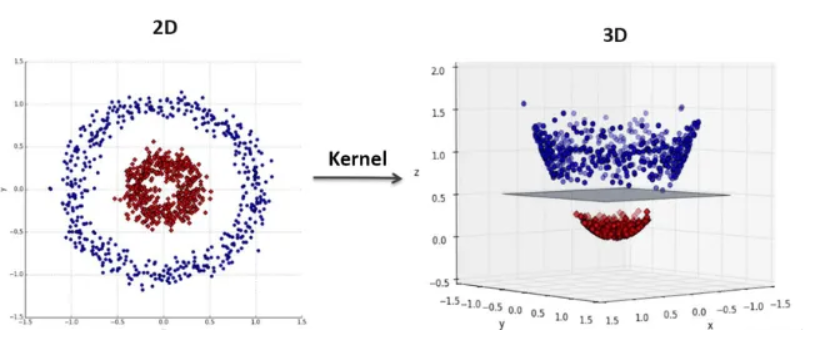 [46]

As we can see, the kernel trick has helped us find a solution for a non-linearly separable dataset.[46]

I hope this made things a bit better, because now we shall dwelve more into it.

**11.2 Feature Mapping**
Mapping data to a higher-dimensional space in the context of Support Vector Machines (SVMs) involves transforming the input data using a function $\phi(\mathbf{x})$. This transformation can make the data linearly separable in the higher-dimensional space. The kernel trick allows us to perform this mapping implicitly using kernel functions, avoiding the computational complexity of explicitly calculating it, which is really good but i still will show a quick example.

Introducing a mapping function $\phi$ that maps each data point $\mathbf{x}$ from the input space to a higher-dimensional feature space:
$$\mathbf{x} -> \phi(\mathbf{x})$$

**Inner Products:** The decision function in SVMs relies on inner products (dot products) between data points: 

$$\mathbf{w} \cdot \mathbf{x} + b$$

Becomes:
$$\mathbf{w} \cdot \phi(\mathbf{x})+ b$$

**Example**
For understanding purposes, let’s consider an example of an explicit mapping from a two-dimensional space to a higher-dimensional space.
Consider data points in a 2D space $\mathbf{x} = [x_1, x_2]$. We want to map these points to a 3D space using the following mapping function:
$$\phi(\mathbf{x})= [x_1^{2},x_2^{2},\sqrt{2x_1 x_2}]$$


**11.3 Kernel trick**
The kernel trick allows us to work in the high-dimensional feature space without explicitly performing the transformation $\phi(\mathbf{x})$ (I know I am repeating myself,but that fact just makes this trick even better). Instead, we use a kernel function $\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j)$ that computes the dot product(inner product) between the transformed feature vectors $\phi(\mathbf{x}_i)$ and $\phi(\mathbf{x}_j)$

**Mathematical formulation** 
$$\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$

**11.4 Kernel functions/types of kernels**
There are multiple kernel types we could use to classify the data. Some of the most popular ones are linear kernel, polynomial kernel, and RBF kernel(Gaussian kernel).The choice of kernel relies on the nature of the data and the job at hand. The linear kernel is used when the data is roughly linearly separable, whereas the polynomial kernel is used when the data has a complicated curved border. The Gaussian kernel is employed when the data has no clear boundaries and contains complicated areas of overlap. [47]

**1.Linear kernel** The linear kernel is the simplest type of kernel, and it does not perform any implicit mapping of the data to a higher-dimensional space. It is essentially the standard dot product of two vectors. 

**Mathematical Formulation**
$$\mathbf{K}(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$ 

Basically the same as the one I showed above.

**Use cases**
1. Linearly Separable Data: Best suited for data that can be separated by a straight line (in 2D) or a hyperplane (in higher dimensions).
2. High-Dimensional Sparse Data: Effective for text classification problems (e.g., spam detection) where data is sparse and high-dimensional.

**2.Polynomial kernel**The polynomial kernel represents the similarity of vectors in a feature space over polynomials of the original variables. It allows for learning non-linear models by increasing the dimensionality of the feature space polynomially.

**Mathematical formulation**


**Use cases**
1. Moderate Complexity: Useful when the relationship between class labels and attributes is moderately complex.
2. Flexible Non-Linearity: Suitable for datasets where interactions between features can be well captured by polynomial terms.

3.**The radial basis function RBF or Gaussian kernel** The Gaussian kernel, also known as the Radial Basis Function (RBF) kernel, maps data points into an infinite-dimensional space. It is capable of handling very complex non-linear relationships by considering the distance between data points.
It will result in a more complex decision boundary. The RBF kernel contains a parameter $\gamma$. A sma

**Mathematical formulation**




implementation
1.code - scikit learn
2. code- if posssible manual 

applications 
1. why are they universal
2. neural networks
3. other apllications

conclusion


bibliography